In [1]:
from crystack.interactions import Interactions
from crystack import cif2supercell

In [2]:
crystal_name = "12h_1"
orient_dict = cif2supercell.run_dimer_generator("opt_1.cif", 78, out_mol=15)

There are 54 molecules with the correct #atoms in supercell.
2 a
17 a
15 b
3 b
0 a
13 a
11 a
5 c
23 c
6 b
9 b
4 a
20 c
8 c
25 c


In [3]:
from glob import glob
dimer_files = glob('real_dimer*mol')
for f in dimer_files:
    print(f)

real_dimer_1_20.mol
real_dimer_1_9.mol
real_dimer_1_23.mol
real_dimer_1_8.mol
real_dimer_1_25.mol
real_dimer_1_3.mol
real_dimer_1_15.mol
real_dimer_1_2.mol
real_dimer_1_0.mol
real_dimer_1_17.mol
real_dimer_1_5.mol
real_dimer_1_13.mol
real_dimer_1_4.mol
real_dimer_1_6.mol
real_dimer_1_11.mol


In [4]:
import re 
pi_stacks = []
pi_stack_dir = {}
dominant_dir = {}
for f in dimer_files: 
    basen = f.split(".")[0]
    print(basen)
    last_val = re.findall("[0-9]+", basen)
    mol_int = int(last_val[-1])
    print(mol_int)
    dominant_dir[mol_int] = orient_dict[mol_int]
    dimer = Interactions(f"{basen}")
    dimer.make_mol_obj()
    pi_stack_dimer = dimer.calculate_pi_stacks()
    pi_stacks.append(pi_stack_dimer)
    pi_stack_dir[mol_int] = pi_stack_dimer 

real_dimer_1_20
20
n_atoms(dimer):  156
real_dimer_1_9
9
n_atoms(dimer):  156
real_dimer_1_23
23
n_atoms(dimer):  156
real_dimer_1_8
8
n_atoms(dimer):  156
real_dimer_1_25
25
n_atoms(dimer):  156
real_dimer_1_3
3
n_atoms(dimer):  156
real_dimer_1_15
15
n_atoms(dimer):  156
real_dimer_1_2
2
n_atoms(dimer):  156
real_dimer_1_0
0
n_atoms(dimer):  156
real_dimer_1_17
17
n_atoms(dimer):  156
real_dimer_1_5
5
n_atoms(dimer):  156
real_dimer_1_13
13
n_atoms(dimer):  156
Relevant stack:  3.7353701140434374 Type of Int:  P Offset:  1.2284369926285277
Relevant stack:  3.844697156112843 Type of Int:  P Offset:  1.043187945385185
Relevant stack:  3.7350967003694957 Type of Int:  P Offset:  0.9678484955171104
real_dimer_1_4
4
n_atoms(dimer):  156
Relevant stack:  4.167166140063154 Type of Int:  P Offset:  1.2992785328744927
Relevant stack:  4.16683046678035 Type of Int:  P Offset:  1.465447242233528
Relevant stack:  4.010252184505773 Type of Int:  P Offset:  1.0802172975517181
real_dimer_1_6
6
n_at

In [5]:

# dimer = Interactions(f"{filepath}")
# dimer.basen
# dimer.interacting_mols
# dimer.make_mol_obj()
#pi_stacks = dimer.calculate_pi_stacks()
#dimer.calculate_short_contacts(vdwextra=0.5)
#dimer.calculate_short_contacts(vdwextra=0.5)
#dimer.calculate_hydrophobic_interactions()

In [6]:
# #! not in use
# import matplotlib.pyplot as plt

# n_hydro = len(dimer.hydro_stacks)
# n_pi = len(dimer.pi_stacks)
# n_short = len(dimer.short_stacks)
# #! not in use
# hydro_dists = []
# for i, n in enumerate(dimer.hydro_stacks):
#     print(n.distance)
#     hydro_dists.append(n.distance)

In [7]:
# #! not in use
# pi_dists = []
# for i, sublist in enumerate(pi_stacks):
#     for i, n in enumerate(sublist):
#         print(n.distance, n.angle, n.type)
#         pi_dists.append(n.distance)

# pi_dists

In [8]:
print(len(dominant_dir))
dominant_dir

15


{20: 'c',
 9: 'b',
 23: 'c',
 8: 'c',
 25: 'c',
 3: 'b',
 15: 'b',
 2: 'a',
 0: 'a',
 17: 'a',
 5: 'c',
 13: 'a',
 4: 'a',
 6: 'b',
 11: 'a'}

In [30]:
pi_dists = []
pi_angles = []
pi_types = []
dominant_dir_val = []
interacting_mols = []
unique_rings_on_mol = []
for i, dimer_no in enumerate(pi_stack_dir):
    for i, n in enumerate(pi_stack_dir[dimer_no]):
        print(n.position_ringA, n.position_ringB)
        print(n.ringA.center, n.ringB.center)
        unique_rings_on_mol.append(n.ringA.center)
        #print(n.pistack)#.center) #print(n[center])
        print(n.distance, n.angle, n.type)
        pi_dists.append(n.distance)
        pi_angles.append(n.angle)
        pi_types.append(n.type)
        dominant_dir_val.append(dominant_dir[dimer_no])
        interacting_mols.append(dimer_no)


bridged terminal
[24.347333333333335, 13.121666666666668, 40.499833333333335] [21.038, 11.682666666666668, 41.464499999999994]
3.7353701140434374 4.606669548916897 P
terminal terminal
[22.725666666666665, 14.950666666666665, 40.344833333333334] [21.038, 11.682666666666668, 41.464499999999994]
3.844697156112843 3.2138557078302217 P
terminal bridged
[22.725666666666665, 14.950666666666665, 40.344833333333334] [19.416666666666668, 13.511833333333334, 41.30983333333334]
3.7350967003694957 10.074263416584044 P
bridged terminal
[27.04716666666667, 15.986833333333331, 34.181666666666665] [30.551333333333332, 17.694999999999997, 32.70916666666667]
4.167166140063154 18.311803724129522 P
terminal bridged
[27.800666666666668, 17.81683333333333, 35.624833333333335] [31.304666666666673, 19.52466666666667, 34.152499999999996]
4.16683046678035 15.803803492987205 P
terminal terminal
[27.800666666666668, 17.81683333333333, 35.624833333333335] [30.551333333333332, 17.694999999999997, 32.70916666666667]


In [47]:
m = unique_rings_on_mol
m

[[22.725666666666665, 14.950666666666665, 40.344833333333334],
 [22.725666666666665, 14.950666666666665, 40.344833333333334],
 [24.347333333333335, 13.121666666666668, 40.499833333333335],
 [27.04716666666667, 15.986833333333331, 34.181666666666665],
 [27.800666666666668, 17.81683333333333, 35.624833333333335],
 [27.800666666666668, 17.81683333333333, 35.624833333333335]]

In [45]:
import itertools

n = [list(i) for i in set(map(tuple, m))]

In [51]:
frac = len(n)/12
frac

0.3333333333333333

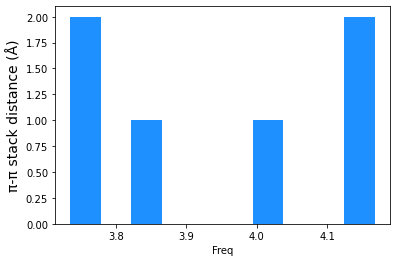

In [11]:
import matplotlib.pyplot as plt
plt.hist(pi_dists, color="dodgerblue")
plt.xlabel("Freq")
plt.ylabel("π-π stack distance (Å)", fontsize=14)
plt.savefig(f"Pi_stack_dist_{crystal_name}.png")

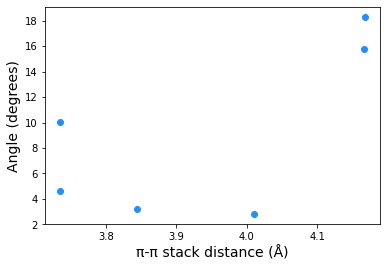

In [12]:
plt.ylabel("Angle (degrees)", fontsize=14)
plt.xlabel("π-π stack distance (Å)", fontsize=14)
plt.scatter(pi_dists, pi_angles, color="dodgerblue") # hue=pi_types) #c=pi_types)

/Users/julia/anaconda/envs/py38contacts/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


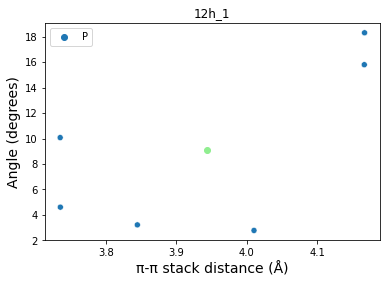

In [13]:
import seaborn as sns 
import numpy as np
# def mean_pi_dist(pi_angles, pi_dists):
    
#     return theta_mean, d_mean

sns.scatterplot(pi_dists, pi_angles, hue=pi_types, c="dodgerblue") #dominant_dir_val
plt.scatter(np.mean(pi_dists), np.mean(pi_angles), c="lightgreen")
plt.xlabel("π-π stack distance (Å)", fontsize=14)
plt.ylabel("Angle (degrees)", fontsize=14)
plt.title(f"{crystal_name}")
plt.savefig(f"Pi_stacks_{crystal_name}_types.png", dpi=100)

/Users/julia/anaconda/envs/py38contacts/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


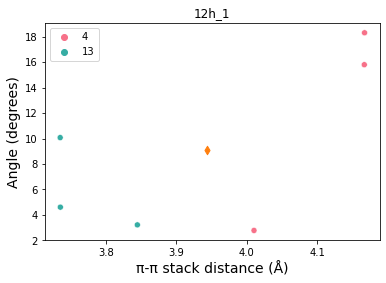

In [15]:
husl_palette = sns.color_palette("husl", 2)
sns.scatterplot(pi_dists, pi_angles, hue=interacting_mols, palette=husl_palette) #dominant_dir_val
plt.scatter(np.mean(pi_dists), np.mean(pi_angles), marker="d", label="mean")#, c="lightgreen")
plt.xlabel("π-π stack distance (Å)", fontsize=14)
plt.ylabel("Angle (degrees)", fontsize=14)
plt.title(f"{crystal_name}")
plt.savefig(f"Pi_stacks_{crystal_name}_interacting_mols.png", dpi=100)